In [85]:
import pandas as pd


review_file = pd.read_json('/Users/sindhuram/Documents/Mine/SJSU/Sem2/256Guzun/TeamProj/YelpDataSet/yelp_dataset/business.json',lines=True)
review_file.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,{'GoodForKids': 'False'},1SWheh84yJXfytovILXOAQ,"Golf, Active Life",Phoenix,None,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,"{'RestaurantsReservations': 'True', 'GoodForMe...",QXAEGFB4oINsVuTFxEYKFQ,"Specialty Food, Restaurants, Dim Sum, Imported...",Mississauga,"{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...",1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15","{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...",gnKjwL_1w79qoiV3IC_xQQ,"Sushi Bars, Restaurants, Japanese",Charlotte,"{'Monday': '17:30-21:30', 'Wednesday': '17:30-...",1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",None,xvX2CttrVhyG2z1dFg_0xw,"Insurance, Financial Services",Goodyear,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F","{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...",HhyxOkGAM07SRYtlQ4wMFQ,"Plumbing, Shopping, Local Services, Home Servi...",Charlotte,"{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [86]:
import os
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('yelp_data_exploration').getOrCreate()
yelp_review = spark.read.json('/Users/sindhuram/Documents/Mine/SJSU/Sem2/256Guzun/TeamProj/YelpDataSet/yelp_dataset/review.json')

In [87]:
yelp_review.show(100)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|ujmEBvifdJM6h6RLv...|   0|2013-05-07 04:34:36|    1|Q1sbwvVQXV2734tPg...|  1.0|Total bill for th...|     6|hG7b0MtEbXx5QzbzE...|
|NZnhc2sEQy3RmzKTZ...|   0|2017-01-14 21:30:33|    0|GJXCdrto3ASJOqKeV...|  5.0|I *adore* Travis ...|     0|yXQM5uF2jS6es16SJ...|
|WTqjgwHlXbSFevF32...|   0|2016-11-09 20:09:03|    0|2TzJjDVDEuAW6MR5V...|  5.0|I have to say tha...|     3|n6-Gk65cPZL6Uz8qR...|
|ikCg8xy5JIg_NGPx-...|   0|2018-01-09 20:56:38|    0|yi0R0Ugj_xUx_Nek0...|  5.0|Went in for a lun...|     0|dacAIZ6fTM6mqwW5u...|
|b1b1eb3uo-w561D0Z...|   0|2018-01-30 23:07:38|    0|11a8sVPMUFtaC7_AB...|  1.0|Today was 

In [88]:
yelp_users = spark.read.json('/Users/sindhuram/Documents/Mine/SJSU/Sem2/256Guzun/TeamProj/YelpDataSet/yelp_dataset/user.json')
yelp_business = spark.read.json('/Users/sindhuram/Documents/Mine/SJSU/Sem2/256Guzun/TeamProj/YelpDataSet/yelp_dataset/business.json')

In [89]:
yelp_users.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



In [90]:
yelp_review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [91]:
yelp_business.printSchema()

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [92]:
yelp_review = yelp_review.drop('cool')
yelp_review.printSchema()
yelp_review_min = yelp_review.drop('funny')
yelp_review_min = yelp_review_min.drop('text')
yelp_review_min = yelp_review_min.drop('useful')
yelp_review_min = yelp_review_min.drop('date')
yelp_review_min.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

root
 |-- business_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- user_id: string (nullable = true)



In [93]:
yelp_review_join =yelp_review_min.join(yelp_business,  yelp_review_min.business_id ==yelp_business.business_id, 'outer').select(yelp_review_min.business_id,yelp_review_min.review_id,yelp_review_min.stars, yelp_review_min.user_id, yelp_business.city,yelp_business.categories)

In [94]:
yelp_review_join.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- city: string (nullable = true)
 |-- categories: string (nullable = true)



In [95]:
yelp_review_join.show(10)

+--------------------+--------------------+-----+--------------------+---------+--------------------+
|         business_id|           review_id|stars|             user_id|     city|          categories|
+--------------------+--------------------+-----+--------------------+---------+--------------------+
|--9e1ONYQuAa-CB_R...|eCJObv4SZupXH5TKW...|  2.0|SFftbQSwHZ24ahhfj...|Las Vegas|Cajun/Creole, Sea...|
|--9e1ONYQuAa-CB_R...|wZS-PPflEIXH7DplZ...|  5.0|OkKNJpVWPZJRmPXbR...|Las Vegas|Cajun/Creole, Sea...|
|--9e1ONYQuAa-CB_R...|tTD3wegtsiHOjVTLg...|  5.0|joe4i-lcCFd2wViA2...|Las Vegas|Cajun/Creole, Sea...|
|--9e1ONYQuAa-CB_R...|7H98TWCrkyRxo8DMf...|  5.0|n_HMBasYWRQxVjts_...|Las Vegas|Cajun/Creole, Sea...|
|--9e1ONYQuAa-CB_R...|jTlP9izKAXbF9T91p...|  3.0|tXhscxwFTd-ayLTdP...|Las Vegas|Cajun/Creole, Sea...|
|--9e1ONYQuAa-CB_R...|cKMqmXYq7643CF8ra...|  5.0|azcT4FIP0FCrCwbMQ...|Las Vegas|Cajun/Creole, Sea...|
|--9e1ONYQuAa-CB_R...|WYNusZjgf6BsISk82...|  5.0|y4O_c6UUAAtPb3Uk-...|Las Vegas|Ca

In [96]:
from pyspark.sql.functions import arrays_zip, col
from pyspark.sql.functions import col, split
yelp_business_new = yelp_business.withColumn("categories", split(col("categories"), ",").cast("array<string>"))
#yelp_business = yelp_business.withColumn("city", split(col("city"), ",").cast("array<string>"))


In [97]:
yelp_business_new.show(10)

+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|         city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|2818 E Camino Ace...|[,,,,,,,,,,,,,,,,...|1SWheh84yJXfytovI...|[Golf,  Active Life]|      Phoenix|                null|      0|   33.5221425|   -112.0184807|Arizona Biltmore ...|      85016|           5|  3.0|   AZ|
|30 Eglinton Avenue W|[,, u'full_bar', ...|QXAEGFB4oINsVuTFx...|[Specialty Food, ...|  Mississauga|[9:0-1:0, 9:0-0:0...|      1|43.6

In [98]:
from pyspark.sql.functions import explode
yelp_business_store = (yelp_business_new 
    .withColumn("categories", explode("categories"))
    .select( col("categories"), col("city")))

In [99]:
yelp_business_store

DataFrame[categories: string, city: string]

In [100]:
def func1(line):
    return ((line.categories,line.city),1)
yelp_business_map = yelp_business_store.rdd.map(func1)

In [101]:
from operator import add
yelp_business_map_final = yelp_business_map.reduceByKey(add)
yelp_business_map_sorted = yelp_business_map_final.sortBy(lambda x: x[1],ascending=False)

In [102]:
yelp_business_map_sorted.collect()

[((' Restaurants', 'Toronto'), 5455),
 ((' Restaurants', 'Las Vegas'), 4610),
 ((' Shopping', 'Las Vegas'), 3905),
 ((' Food', 'Toronto'), 2989),
 ((' Restaurants', 'Phoenix'), 2815),
 ((' Home Services', 'Las Vegas'), 2781),
 ((' Food', 'Las Vegas'), 2664),
 ((' Restaurants', 'Montréal'), 2542),
 (('Restaurants', 'Toronto'), 2509),
 ((' Shopping', 'Phoenix'), 2416),
 ((' Beauty & Spas', 'Las Vegas'), 2334),
 ((' Health & Medical', 'Las Vegas'), 2328),
 ((' Shopping', 'Toronto'), 2315),
 ((' Home Services', 'Phoenix'), 2302),
 ((' Restaurants', 'Calgary'), 2049),
 ((' Restaurants', 'Charlotte'), 1971),
 ((' Local Services', 'Las Vegas'), 1891),
 (('Restaurants', 'Las Vegas'), 1840),
 ((' Restaurants', 'Pittsburgh'), 1707),
 ((' Food', 'Phoenix'), 1672),
 ((' Nightlife', 'Las Vegas'), 1602),
 ((' Health & Medical', 'Phoenix'), 1577),
 ((' Event Planning & Services', 'Las Vegas'), 1497),
 ((' Automotive', 'Las Vegas'), 1447),
 ((' Local Services', 'Phoenix'), 1444),
 ((' Nightlife', 'Tor

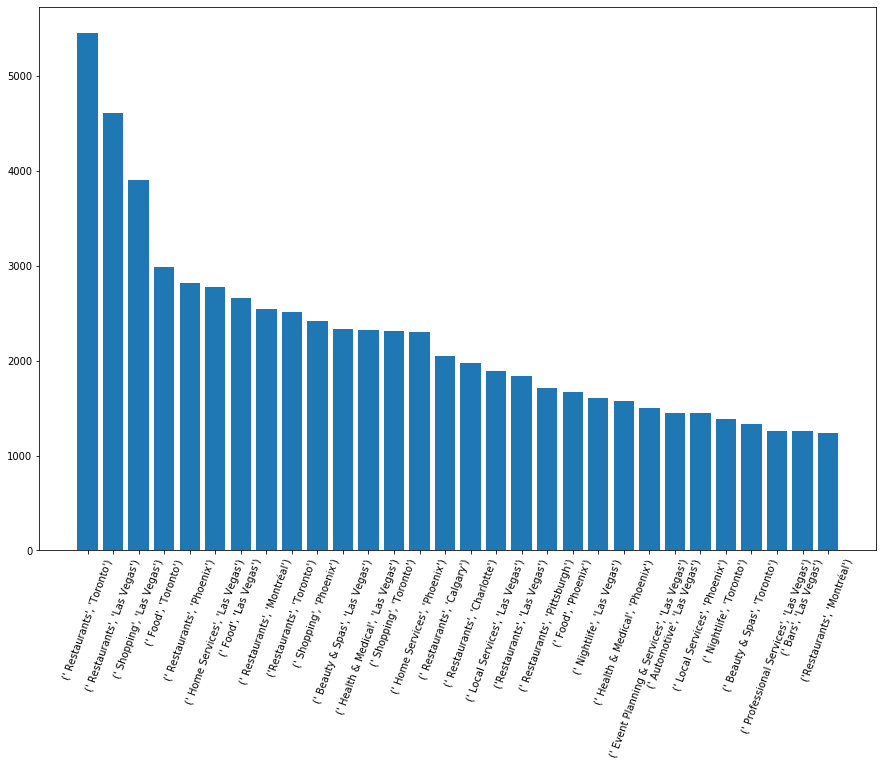

In [103]:
import matplotlib.pyplot as plt
#yelp_business_map_sorted.take(30).plot(kind = 'bar')
y1=yelp_business_map_sorted.collect()[:30]
type(y1)
plt.figure(figsize=(15,10))
plt.bar(range(len(y1)), [val[1] for val in y1], align='center')
plt.xticks(range(len(y1)), [val[0] for val in y1])
plt.xticks(rotation=70)
plt.show()

In [104]:
yelp_review_lasVegas = yelp_review_join.filter( yelp_review_join.city == 'Las Vegas').filter( yelp_review_join.categories.contains('Restaurant'))

In [105]:
yelp_review_Toronto = yelp_review_join.filter( yelp_review_join.city == 'Toronto').filter( yelp_review_join.categories.contains('Restaurant'))

In [106]:
cols = ['user_id', 'business_id', 'stars']
def get_clean_df(df, min_user_review = 30, min_res_review = 0):
    df_1 = df.select(cols)
    df_1 = df_1.na.drop()

#df_1 = df_1.withColumn(cols[1]+'_freq', df_1.groupby(cols[1])[cols[1]].transform('count'))
    df_2 =df_1.groupby(cols[1]).count();
    df_2 = df_2.select('business_id', col('count').alias("business_id_freq"))
    df_3 =df_1.join(df_2, df_2.business_id == df_1.business_id, 'outer').drop(df_2.business_id)
    df_4 = df_3.filter(df_3.business_id_freq >= min_res_review)
    df_5 =df_4.groupby(cols[0]).count();
    df_5 = df_5.select('user_id', col('count').alias("user_id_freq"))
    df_6 =df_4.join(df_5, df_5.user_id == df_4.user_id, 'outer').drop(df_4.user_id)
    df_7 = df_6.filter(df_6.user_id_freq >= min_user_review)
    return df_7

In [107]:
clean_LV_data = get_clean_df(yelp_review_lasVegas)
clean_toronto_data = get_clean_df(yelp_review_Toronto)

In [108]:
#Converts the Data Frame into sparse matrix
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
def toSparseMatrix(dataframe):
    df = dataframe.select("*").toPandas()
    distinct_business_ids = list(df['business_id'].unique())
    distinct_user_ids = list(df['user_id'].unique())
    data = df['stars'].tolist()
    row = df['user_id'].astype('category', categories=distinct_user_ids).cat.codes
    col = df['business_id'].astype('category', categories=distinct_business_ids).cat.codes
    sparse_matrix = csr_matrix((data, (row, col)), shape=(len(distinct_user_ids), len(distinct_business_ids)))
    return sparse_matrix

In [109]:
toronto_matrix_30 = toSparseMatrix(clean_toronto_data)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [110]:
clean_toronto_data_20 = get_clean_df(yelp_review_Toronto,20)

In [111]:
clean_toronto_data_10 = get_clean_df(yelp_review_Toronto,10)

In [112]:
clean_toronto_data_5 = get_clean_df(yelp_review_Toronto,5)

In [113]:
toronto_matrix_20 = toSparseMatrix(clean_toronto_data_20)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [114]:
toronto_matrix_10 = toSparseMatrix(clean_toronto_data_10)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [115]:
toronto_matrix_5 = toSparseMatrix(clean_toronto_data_5)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


In [116]:
def getSparsity(sparse_matrix):
    return 1 - sparse_matrix.nnz/(sparse_matrix.shape[0]*sparse_matrix.shape[1])

## Optimal data count using sparse matrix based on number of user review count for a restaurants

In [117]:
print(toronto_matrix_30.shape)
print(toronto_matrix_20.shape)
print(toronto_matrix_10.shape)
print(toronto_matrix_5.shape)

(1899, 7491)
(3076, 7649)
(6983, 7834)
(15600, 7914)


In [118]:
clean_LV_data_10 = get_clean_df(yelp_review_lasVegas,10)

In [119]:
lV_matrix_10 = toSparseMatrix(clean_LV_data_10)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


## Sparse matrix with user review count 10, to split data for training and testing

In [120]:
def train_val_test_split(sparse_matrix, num_review_val = 2, num_review_test = 2):
    #Split the rating matrix into train ,val, and test marix that are disjoint matrices
    nzrows, nzcols =  sparse_matrix.nonzero()
    sparse_matrix_test = csr_matrix(sparse_matrix.shape)
    sparse_matrix_val = csr_matrix(sparse_matrix.shape)
    sparse_matrix_train = sparse_matrix.copy()
    n_users = sparse_matrix.shape[0]
    for u in range(n_users):
        idx = nzcols[np.where(nzrows == u)]
        np.random.shuffle(idx)
        test_idx = idx[-num_review_test:]
        val_idx = idx[-(num_review_val+num_review_test):-num_review_test]
        train_idx = idx[:-(num_review_val+num_review_test)]
        sparse_matrix_test[u,test_idx] = sparse_matrix[u,test_idx]
        sparse_matrix_val[u,val_idx] = sparse_matrix[u,val_idx]
        sparse_matrix_train[u,test_idx] = 0
        sparse_matrix_train[u,val_idx] = 0
    data = np.array(sparse_matrix_train[sparse_matrix_train.nonzero()])[0]
    row = sparse_matrix_train.nonzero()[0]
    col = sparse_matrix_train.nonzero()[1]
    size = sparse_matrix_train.shape
    sparse_matrix_train = csr_matrix((data,(row,col)),shape = size)
    mult = sparse_matrix_train.multiply(sparse_matrix_val)
    mmult = mult.multiply(sparse_matrix_test)
    assert(mmult.nnz == 0)
    return sparse_matrix_train, sparse_matrix_val, sparse_matrix_test

In [121]:
toronto_train_10, toronto_val_10, toronto_test_10 = train_val_test_split(toronto_matrix_10)
vegas_train_10, vegas_val_10, vegas_test_10 =  train_val_test_split(lV_matrix_10)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/Users/sindhuram/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


## Training data for Toronto

In [122]:
print(toronto_train_10.nnz, toronto_val_10.nnz, toronto_test_10.nnz)

169756 13966 13966


## Training data for Las Vegas

In [123]:
print(vegas_train_10.nnz, vegas_val_10.nnz, vegas_test_10.nnz)

350133 37661 37667


# SVD Model Building

## For Toronto

In [124]:
import numpy as np
U_matrix_toronto, S_matrix_toronto, Vt_matrix_ptoronto = np.linalg.svd(toronto_train_10.todense())

In [125]:
print("Minimum singular value = ",min(S_matrix_toronto))
print("Maximum singular value = ",max(S_matrix_toronto))
S_matrix_toronto_diagonal = np.diag(S_matrix_toronto)
print(S_matrix_toronto.shape)

smallest singular value =  0.03031444212420287
largest singular value =  305.806648985408
(6983,)


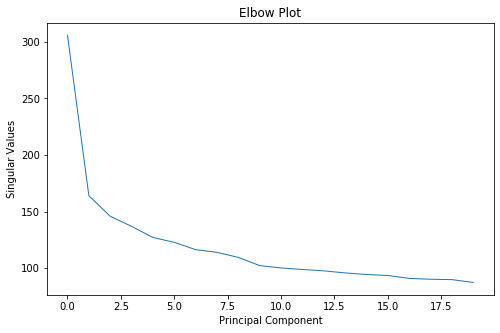

In [126]:
fig = plt.figure(figsize=(8,5))
plt.plot(S_matrix_toronto[:20], '-', linewidth=1)
plt.title('Elbow Plot')
# plt.xticks(np.arange(0, S_phx_res.shape[0]+1, 50), rotation='vertical')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

## For Las Vegas

In [127]:
U_matrix_lasVegas, S_matrix_lasVegas, Vt_matrix_lasVegas = np.linalg.svd(vegas_train_10.todense())

In [128]:
print("Minimum singular value = ",min(S_matrix_lasVegas))
print("Maximum singular value = ",max(S_matrix_lasVegas))
S_matrix_lasVegas_diagonal = np.diag(S_matrix_lasVegas)

smallest singular value =  8.94632610545626e-16
largest singular value =  488.5771675535964


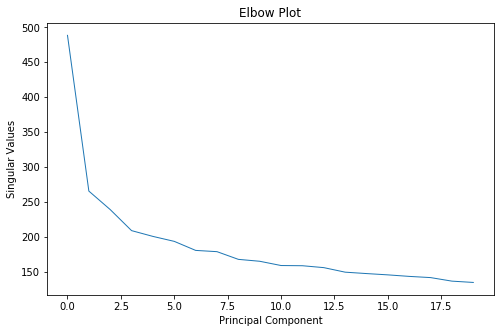

In [129]:
fig = plt.figure(figsize=(8,5))
plt.plot(S_matrix_lasVegas[:20], '-', linewidth=1)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

In [130]:
def MSE_err(k, A, U, S, Vt):
    mat_inter = np.dot(S[:k, :k], Vt[:k, :])
    mat_A = np.dot(U[:, :k], mat_inter)
    index = np.where(A>0);
    diff = A[index] - mat_A[index]
    return np.linalg.norm(diff)**2/diff.shape[1]

## MSE For Toronto

dict_keys([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])


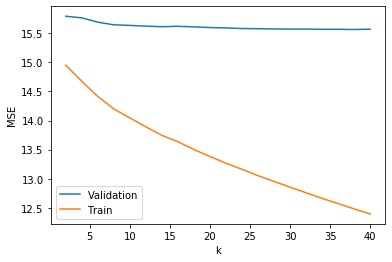

In [131]:
k = np.linspace(2,40,20, dtype = int)
errors_svd_val = {}
errors_svd_train = {}
for i in k:
    errors_svd_val[i] = MSE_err(i, toronto_val_10.todense(), U_matrix_toronto, S_matrix_toronto_diagonal, Vt_matrix_ptoronto)
    errors_svd_train[i] = MSE_err(i, toronto_train_10.todense(), U_matrix_toronto, S_matrix_toronto_diagonal, Vt_matrix_ptoronto)
print(errors_svd_val.keys())
plt.plot(list(errors_svd_val.keys()),list(errors_svd_val.values()), label = 'Validation')
plt.plot(list(errors_svd_train.keys()),list(errors_svd_train.values()), label = 'Train')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()

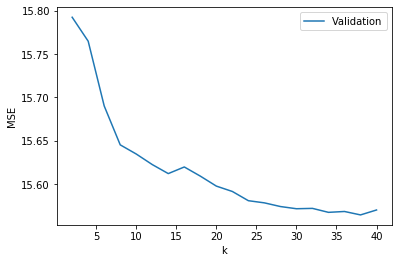

In [132]:
plt.plot(list(errors_svd_val.keys()),list(errors_svd_val.values()), label = 'Validation')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.legend()

In [133]:
Best_Val_MSE_SVD_toronto = MSE_err(32, toronto_val_10.todense(), U_matrix_toronto, S_matrix_toronto_diagonal, Vt_matrix_ptoronto)
print('Mean Squared Error for restaurants in Toronto = ', Best_Val_MSE_SVD_toronto)

Mean Squared Error for restaurants in Toronto=  15.571995745001404


In [134]:
train_toronto_nnz = toronto_train_10.nonzero()
val_toronto_nnz = toronto_val_10.nonzero()
test_toronto_nnz = toronto_test_10.nonzero()

In [135]:
recon_matrix_svd_toronto = np.dot(U_matrix_toronto[:, :10], np.dot(S_matrix_toronto_diagonal[:10,:10], Vt_matrix_ptoronto[:10, :]))
train_preds_svd_toronto = np.ravel(recon_matrix_svd_toronto[train_toronto_nnz])
val_preds_svd_toronto = np.ravel(recon_matrix_svd_toronto[val_toronto_nnz])
test_preds_svd_toronto = np.ravel(recon_matrix_svd_toronto[test_toronto_nnz])

## MSE for Las Vegas

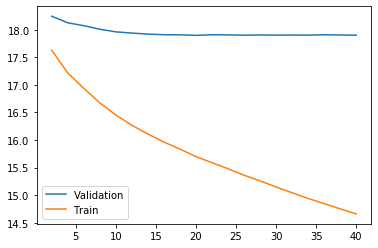

In [136]:
k = np.linspace(2,40,20, dtype = int)
errors_svd_val_lv = {}
errors_svd_train_lv = {}
for i in k:
    errors_svd_val_lv[i] = MSE_err(i, vegas_val_10.todense(), U_matrix_lasVegas, S_matrix_lasVegas_diagonal, Vt_matrix_lasVegas)
    errors_svd_train_lv[i] = MSE_err(i, vegas_train_10.todense(), U_matrix_lasVegas, S_matrix_lasVegas_diagonal, Vt_matrix_lasVegas)

plt.plot(list(errors_svd_val_lv.keys()),list(errors_svd_val_lv.values()), label = 'Validation')
plt.plot(list(errors_svd_train_lv.keys()),list(errors_svd_train_lv.values()), label = 'Train')
plt.legend()

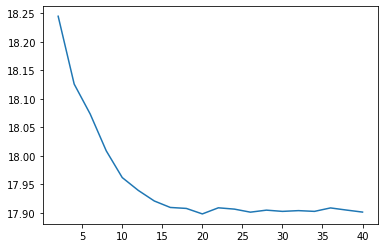

In [137]:
plt.plot(list(errors_svd_val_lv.keys()),list(errors_svd_val_lv.values()), label = 'Validation')

In [139]:
Best_Val_MSE_SVD_lasvegas = MSE_err(26, vegas_val_10.todense(), U_matrix_lasVegas, S_matrix_lasVegas_diagonal, Vt_matrix_lasVegas)
print('Mean Squared Error for restaurants in Las Vegas = ', Best_Val_MSE_SVD_lasvegas)

Mean Squared Error for restaurants in Las Vegas =  17.90114214164882


In [140]:
train_lv_nnz = vegas_train_10.nonzero()
val_lv_nnz = vegas_val_10.nonzero()
test_lv_nnz = vegas_test_10.nonzero()

In [141]:
recon_matrix_svd_lv = np.dot(U_matrix_lasVegas[:, :15], np.dot(S_matrix_lasVegas_diagonal[:15,:15], Vt_matrix_lasVegas[:15, :]))
train_preds_svd_lv = np.ravel(recon_matrix_svd_lv[train_lv_nnz])
val_preds_svd_lv = np.ravel(recon_matrix_svd_lv[val_lv_nnz])
test_preds_svd_lv = np.ravel(recon_matrix_svd_lv[test_lv_nnz])

# SVD with Bias

In [143]:
overall_bias = np.sum(vegas_train_10)/vegas_train_10.nnz
vegas_train_10_wo_bias = vegas_train_10.todense() - overall_bias
U_vegas_wo_bias,S_vegas_wo_bias,Vt_vegas_wo_bias = np.linalg.svd(vegas_train_10_wo_bias)
print("Minimum Singular Value = ", min(S_vegas_wo_bias))
print("Maximum Singular Value = ", max(S_vegas_wo_bias))
S_vegas_wo_bias_dia = np.diag(S_vegas_wo_bias)

Minimum Singular Value =  6.261387727357504e-14
Maximum Singular Value =  43475.50124323539


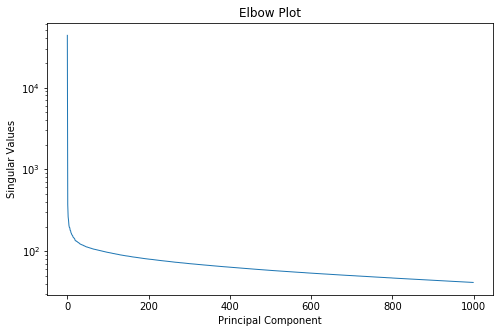

In [144]:
fig = plt.figure(figsize=(8,5))
plt.semilogy(S_vegas_wo_bias[:1000], '-', linewidth=1)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

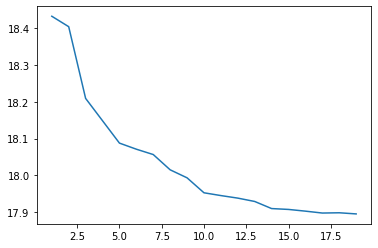

In [152]:
wo_bias_k = np.arange(1,20)
wo_bias_svd_errors = {}
vegas_val_10_wo_bias = vegas_val_10.todense() - overall_bias

for i in wo_bias_k:
    vegas_val_10_wo_bias_cal = np.dot(U_vegas_wo_bias[:, :i],np.dot(S_vegas_wo_bias_dia[:i,:i], Vt_vegas_wo_bias[:i, :]))
    wo_bias_condition = np.where(vegas_val_10.todense() > 0)  
    wo_bias_diff = vegas_val_10_wo_bias[wo_bias_condition] - vegas_val_10_wo_bias_cal[wo_bias_condition]
    wo_bias_svd_errors[i] = np.linalg.norm(wo_bias_diff)**2/wo_bias_diff.shape[1]
plt.plot(list(wo_bias_svd_errors.keys()),list(wo_bias_svd_errors.values()))
                                      

In [156]:
def getOverallUserBias(matrix):
    dense = matrix.todense()
    mask = (dense>0).astype(int)
    u_bias = np.sum(dense, axis = 1)/np.sum(mask, axis = 1)
    r_bias = np.sum(dense, axis = 0)/np.sum(mask, axis = 0)
    u_bias = np.nan_to_num(u_bias)
    r_bias = np.nan_to_num(r_bias)
    u_bias = u_bias.reshape(-1,1)
    r_bias = r_bias.reshape(1,-1)
    matrix_wo_bias = dense - np.tile(u_bias, (1,dense.shape[1])) - np.tile(r_bias, (dense.shape[0], 1))
    return u_bias, r_bias, matrix_wo_bias
    

# For Restaurant's in Las Vegas

In [157]:
u_bias_lv, r_bias_lv, train_lv = getOverallUserBias(vegas_train_10)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [159]:
U_lv_wo_bias, S_lv_wo_bias, Vt_lv_wo_bias = np.linalg.svd(train_lv)
print("Minimum Singular Value = ", min(S_lv_wo_bias))
print("Minimum Singular Value = ", max(S_lv_wo_bias))
S_lv_wo_bias_dia = np.diag(S_lv_wo_bias)

Minimum Singular Value =  9.083414441071615e-14
Minimum Singular Value =  84315.85436643439


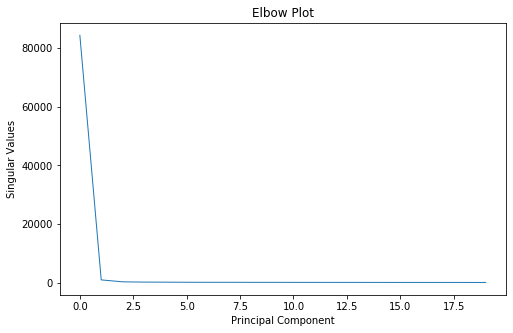

In [160]:
fig = plt.figure(figsize=(8,5))
plt.plot(S_lv_wo_bias[:20], '-', linewidth=1)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Singular Values')
plt.show()

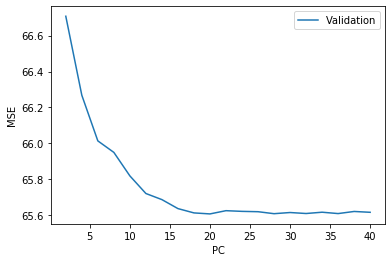

In [163]:
wo_bias_k1 = np.linspace(2,40,20, dtype = int)
wo_bias_svd_errors1 = {}
vegas_val_10_wo_bias1 = vegas_val_10.todense() - r_bias_lv

for i in wo_bias_k1:
    vegas_val_10_wo_bias_cal1 = np.dot(U_lv_wo_bias[:, :i],np.dot(S_lv_wo_bias_dia[:i,:i], Vt_lv_wo_bias[:i, :]))
    wo_bias_condition1 = np.where(vegas_val_10.todense() > 0)
    wo_bias_diff1 = vegas_val_10_wo_bias1[wo_bias_condition1] - vegas_val_10_wo_bias_cal1[wo_bias_condition1]
    wo_bias_svd_errors1[i] = np.linalg.norm(wo_bias_diff1)**2/wo_bias_diff1.shape[1]
plt.plot(list(wo_bias_svd_errors1.keys()),list(wo_bias_svd_errors1.values()), label= 'Validation')
plt.xlabel('PC')
plt.ylabel('MSE')
plt.legend()    

# For Restaurant's Toronto Restaurants

In [164]:
u_bias_trt, r_bias_trt, train_trt = getOverallUserBias(toronto_train_10)

/Users/sindhuram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [165]:
U_trt_wo_bias, S_trt_wo_bias, Vt_trt_wo_bias = np.linalg.svd(train_trt)
print("Minimum singular value = ",min(S_trt_wo_bias))
print("largest singular value = ",max(S_trt_wo_bias))
S_trt_wo_bias_dia = np.diag(S_trt_wo_bias)

Minimum singular value =  0.030744484763064062
largest singular value =  54570.685354631954


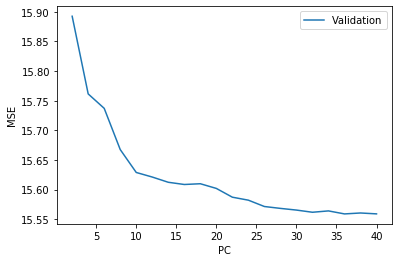

In [168]:
wo_bias_k_trt = np.linspace(2,40,20, dtype = int)
wo_bias_svd_errors_trt = {}
trt_val_10_wo_bias = toronto_val_10.todense() - u_bias_trt - r_bias_trt

for i in wo_bias_k_trt:
    trt_val_10_wo_bias_cal = np.dot(U_trt_wo_bias[:, :i], np.dot(S_trt_wo_bias_dia[:i,:i], Vt_trt_wo_bias[:i, :]))
    trt_wo_bias_condition = np.where(toronto_val_10.todense()>0)
    trt_wo_bias_diff = trt_val_10_wo_bias[trt_wo_bias_condition] - trt_val_10_wo_bias_cal[trt_wo_bias_condition]
    wo_bias_svd_errors_trt[i] = np.linalg.norm(trt_wo_bias_diff)**2/trt_wo_bias_diff.shape[1]
plt.plot(list(wo_bias_svd_errors_trt.keys()),list(wo_bias_svd_errors_trt.values()), label = 'Validation')
plt.xlabel('PC')
plt.ylabel('MSE')
plt.legend()
    
    

# Cosine Similarity 

# ALS

In [176]:
def als(matrix, k =40, u=0, r=0, iters=10):
    matrix = matrix.T
    user = np.random.rand(matrix.shape[1],k).T
    rating = np.random.rand(matrix.shape[0],k).T
    for i in range(iters):
        for each_user in range(matrix.shape[1]):
            user[:,each_user] = np.linalg.solve(np.dot(rating,rating.T) + u * np.eye(rating.shape[0]), np.dot(rating,matrix[:,each_user]))
        for each_rating in range(matrix.shape[0]):
            rating[:,each_rating] = np.linalg.solve(np.dot(user,user.T) + r * np.eye(user.shape[0]), np.dot(user,matrix[each_rating,:].T))
        pred = np.dot(rating.T, user)
    return np.dot(rating.T, user).T

In [177]:
from sklearn.metrics import mean_squared_error
def mseCalculation(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

# For Restuarants in Las Vegas

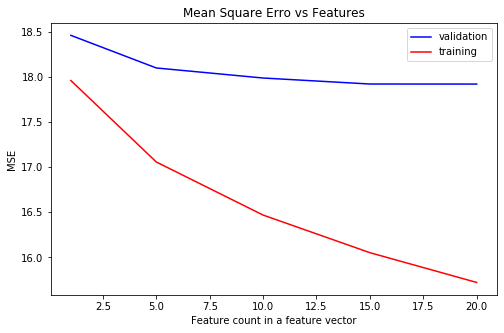

In [178]:
lines = np.linspace(1,20,5,dtype=int)
als_errors_test = []
als_errors_train = []
for i in lines:
    als_pred = als(np.array(vegas_train_10.todense()), k=i, iters = 5)
    err_test = mseCalculation(als_pred, np.array(vegas_val_10.todense()))
    err_train = mseCalculation(als_pred, np.array(vegas_train_10.todense()))
    als_errors_test.append(err_test)
    als_errors_train.append(err_train)
    
fig = plt.figure(figsize=(8,5))
plt.plot(lines,als_errors_test,'b-',label = 'validation')
plt.plot(lines,als_errors_train,'r-', label = 'training')
plt.title('Mean Square Erro vs Features')
plt.xlabel('Feature count in a feature vector')
plt.ylabel('MSE')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

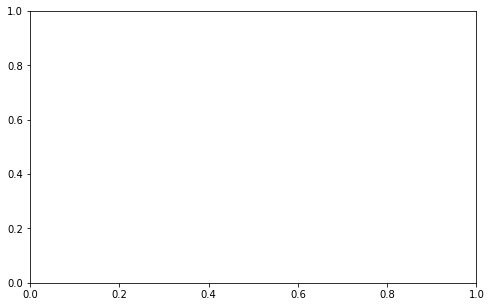

In [193]:
reg_user = np.logspace(-4, 3, 7)
als_errors_val = {}
fig = plt.figure(figsize=(8,5))
for i in reg_user:
    als_errors_val[i] = []
    als_prediction = als(np.array(vegas_train_10.todense()), k=10, iters = 5, u=i, r=i)
    error_val = mseCalculation(als_prediction, np.array(vegas_val_10.todense()))
    als_errors_val[i].append(error_val)
plt.plot(np.log10(reg_user), als_errors_val.values())

plt.title('MSE vs Regularization')
plt.xlabel('Regularization (log Scale) (User Reg =  Res Reg)')
plt.ylabel('MSE')

In [184]:
lv_als_prediction = als(np.array(vegas_train_10.todense()),k=10, iters = 5, u=0.001 , r=0.001)
val_MSE_als_lv = mseCalculation(lv_als_prediction, np.array(vegas_val_10.todense()))
print('ALS MSE for Restaurants in Lav Vegas = ', val_MSE_als_lv)

ALS MSE for Restaurants in Lav Vegas =  17.974896774382866


In [186]:
als_lv_train_pred = lv_als_prediction[train_lv_nnz]
als_lv_val_pred = lv_als_prediction[val_lv_nnz]
als_lv_test_pred = lv_als_prediction[test_lv_nnz]

# For Restaurant's in Toronto

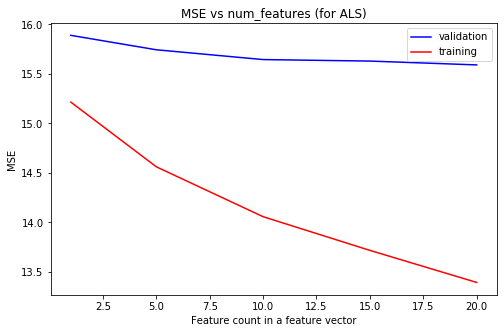

In [187]:
trt_lines = np.linspace(1,20,5,dtype=int)
als_errors_trt_test = []
als_errors_trt_train = []
for i in trt_lines:
    als_preds_trt = als(np.array(toronto_train_10.todense()), k=i, iters = 5)
    test_err_trt = mseCalculation(als_preds_trt, np.array(toronto_val_10.todense()))
    train_err_trt = mseCalculation(als_preds_trt, np.array(toronto_train_10.todense()))
    als_errors_trt_test.append(test_err_trt)
    als_errors_trt_train.append(train_err_trt)
    
fig = plt.figure(figsize=(8,5))
plt.plot(trt_lines,als_errors_trt_test,'b-',label = 'validation')
plt.plot(trt_lines,als_errors_trt_train,'r-', label = 'training')
plt.title('MSE vs num_features (for ALS)')
plt.xlabel('Feature count in a feature vector')
plt.ylabel('MSE')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

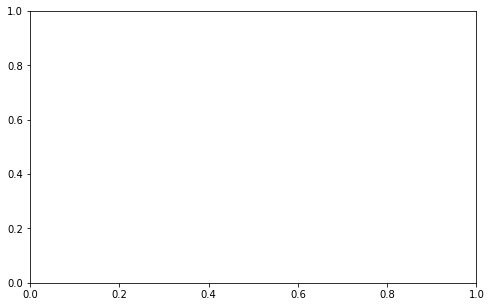

In [194]:
reg_user_trt= np.logspace(-4,3,7)
als_errors_val_trt = {}
# train_error_als = {}
fig = plt.figure(figsize=(8,5))
for i in reg_user_trt:
    als_errors_val_trt[i] = []
    als_pred_val_trt = als(np.array(toronto_train_10.todense()),k=10, iters = 5, u=i, r=i)
    als_err_val_trt = mseCalculation(als_pred_val_trt, np.array(toronto_val_10.todense()))
    als_errors_val_trt[i].append(als_err_val_trt)
plt.plot(np.log10(reg_user_trt),als_errors_val_trt.values())

plt.title('MSE vs Regularization')
plt.xlabel('Regularization (log Scale) (User Reg =  Res Reg)')
plt.ylabel('MSE')

In [195]:
als_prediction_toranto = als(np.array(toronto_train_10.todense()),k=10, iters = 5, u=0.01, r=0.01)
val_MSE_als_trt = mseCalculation(als_prediction_toranto, np.array(toronto_val_10.todense()))
print('Best Validation MSE for ALS for Restaurants in Toronto= ', val_MSE_als_trt)

Best Validation MSE for ALS for Restaurants in Toronto=  15.65300440137771


In [197]:
als_trt_train_pred = als_prediction_toranto[train_toronto_nnz]
als_trt_val_pred = als_prediction_toranto[val_toronto_nnz]
als_trt_test_pred = als_prediction_toranto[test_toronto_nnz]